#BUAI 446 - Fall 2023
##Homework 1



In this homework assignment, you are asked to develop a neural network model to classify Reuters newswires into one of the 46 different mutually-exclusive topics. Each sample (news) belongs to one and only one category. You will need to use what you learned in the first two lectures to successfully complete this assignment. Please feel free to return to the MNIST and IMDb notebooks as there are many similarities between this homework assignment and the examples we reviewed in class.

I wrote some code below to read the data into your notebook and to get you going.



In [ ]:
from tensorflow.keras.datasets import reuters
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

The words in the train and test datasets are already encoded into numbers (similar to our IMDb example). Each sample is a list of integers (word indices), thus has a different length.

We can decode them back to words easily. Let's decode the 10th training sample.

In [ ]:
word_index = reuters.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
# Note that our indices were offset by 3
# because 0, 1 and 2 are reserved indices for "padding", "start of sequence", and "unknown".
decoded_newswire = ' '.join([reverse_word_index.get(i - 3, '?') for i in train_data[9]])
decoded_newswire

'? lt aramco corp has accepted japanese ? to lift a higher proportion of arab heavy crude oil under term contracts in july oil industry sources said japanese companies requested a ratio of 80 pct arab heavy to 20 pct arab light under a term contract agreement with aramco for 100 000 barrels per day the sources said the contractual ratio is 30 pct heavy crude to 70 pct light japanese demand for heavy crude oil has increased substantially since the all japan ? union ceased ? into the northern mideast gulf last month causing problems with liftings of heavy kuwait and ? crudes reuter 3'

This particular news belongs to category 16 (out of 46 categories).

In [ ]:
train_labels[9]

16

Your job is to build neural network models, try to improve them, explain your analyses clearly, and elaborate on your findings.     

1. Write code to see how many samples are in the train and test sets. (5 pts)
2. Vectorize the train and test data using the 'one-hot-encoding' approach discussed in class. (5 pts)
3. Vectorize the train and test labels the way it is appropriate for multi-class single-label classification. (5 pts)
4. Develop an MLP with 2 hidden layers, each having 64 neurons with ReLU activation function. Also, include the appropriate output layer based on the classification task in hand. Call this `model1`. (5 pts)
5. Compile the model. Use RMSProp optimizer with appropriate loss function, and follow the accuracy metric during training. (5 pts)
6. Shuffle and set apart 1,000 samples in the training data to use as a validation set. (5 pts)
7. Train the model for 30 epochs and use batches of size 512. Also, monitor the performance of the model on the validation set during training. Report the training and validation accuracy. (5 pts)
8.  Evaluate the model on test set and report the test accuracy. Also, predict the class for the first sample in the test set. (10 pts)
9. Use `model.summary()` to see how many trainable parameters (weights and biases) your neural network model has. Explain why each layer has that many parameters? (5 pts)
10. Plot the training and validation loss over training epochs. Also, plot the training and validation accuracy. Interpret these plots: explain if you see any signs of overfitting. (10 pts)
11. Try to improve the performance of your model using regularization methods. Specifically, try the following methods:
*   L2 weight regularization with alpha=0.001 applied to both hidden layers (call it `model2`).
*   dropout with p=0.1 applied to both hidden layers (call it `model3`).

Keep all other parameters the same as your first model. Make sure to monitor perofrmance on the validation set to use in the next question. (20 pts)
12. Create a graph and plot the validation loss of all the three models on that graph. Use this graph to decide which model you are going to select and why. (10 pts)
13. Apply early stopping to your selected model from the previous question to prevent it from overfitting. Call this the `final_model`. Evaluate this `final_model` on the test set and report the test accuracy. How does it compare to the test accuracy you obtained from your first model in Question 8? (10 pts)

Make sure you run all of your code so that the output of each code block appears below it.  Once you are done, download your final `.ipynb` file (File -> Download .ipynb) and submit it on Canvas. Name your file as follows: LastName_FirstName_HW1.ipynb

In [ ]:
from tensorflow.keras import models
from tensorflow.keras import layers

**1. Write code to see how many samples are in the train and test sets. (5 pts)**

In [ ]:
len(train_data)

8982

In [ ]:
len(test_data)

2246

We have 8,982 training examples and 2,246 test examples:

**2. Vectorize the train and test data using the 'one-hot-encoding' approach discussed in class. (5 pts)**

We can vectorize the data with the same code as in the IMDb example:

In [ ]:
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

# Our vectorized training data
x_train = vectorize_sequences(train_data)
# Our vectorized test data
x_test = vectorize_sequences(test_data)

**3. Vectorize the train and test labels the way it is appropriate for multi-class single-label classification. (5 pts)**

To vectorize the labels, we can use "one-hot" encoding (also called "categorical encoding"). One-hot encoding is a widely used format for multi-class single-label classification labels. Note that there is a built-in way to do this in Keras, which you have already seen in our MNIST example:

In [ ]:
from keras.utils.np_utils import to_categorical

one_hot_train_labels = to_categorical(train_labels)
one_hot_test_labels = to_categorical(test_labels)

**4. Develop an MLP with 2 hidden layers, each having 64 neurons with ReLU activation function. Also, include the appropriate output layer based on the classification task in hand. Call this `model1`. (5 pts)**

Now, let's build our first NN model (model1). Note that this problem is an example of multi-class single-label calssification, similar to MNIST. Instead of 10 classes in MNIST, here we have 46 classes.

In [ ]:
model1 = models.Sequential()
model1.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model1.add(layers.Dense(64, activation='relu'))
model1.add(layers.Dense(46, activation='softmax'))

There are two other things you should note about this architecture:

* We are ending the network with a `Dense` layer of size 46. This means that for each input sample, our network will output a vector of length 46. Each entry in this vector (each number) will encode a different output class.
* The last layer uses a `softmax` activation. You have already seen this pattern in the MNIST example. It means that the network will
output a _probability distribution_ over the 46 different output classes, i.e. for every input sample, the network will produce an
output vector of length 46 where `output[i]` is the probability that the sample belongs to class `i`. The 46 probabilities will sum to 1.

The loss function to use in this case is `categorical_crossentropy` (please see the Table we had in our lecture slides).
Categorical_crossentropy measures the distance between two probability distributions:
in our case, between the probability distribution output by our network, and the true distribution of the labels. By minimizing the
distance between these two distributions, we train our network to output something as close as possible to the true labels.

**5. Compile the model. Use RMSProp optimizer with appropriate loss function, and follow the accuracy metric during training. (5 pts)**

In [ ]:
model1.compile(optimizer='rmsprop',
               loss='categorical_crossentropy',
               metrics=['accuracy'])

**6. Shuffle and set apart 1,000 samples in the training data to use as a validation set. (5 pts)**

We can set apart 1,000 samples in our training data to use as a validation set as follows:

In [ ]:
from sklearn.utils import shuffle
x_train, one_hot_train_labels = shuffle(x_train, one_hot_train_labels)

x_val = x_train[:1000]
partial_x_train = x_train[1000:]

y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

**7. Train the model for 30 epochs and use batches of size 512. Also, monitor the performance of the model on the validation set during training. Report the training and validation accuracy. (5 pts)**


Now let's train our network for 30 epochs:

In [ ]:
history_model1 = model1.fit(partial_x_train,
                            partial_y_train,
                            epochs=30,
                            batch_size=512,
                            validation_data=(x_val, y_val))

Epoch 1/30
16/16 [==============================] - 1s 59ms/step - loss: 2.6140 - accuracy: 0.5337 - val_loss: 1.7602 - val_accuracy: 0.6350
Epoch 2/30
16/16 [==============================] - 1s 49ms/step - loss: 1.4020 - accuracy: 0.7087 - val_loss: 1.3545 - val_accuracy: 0.7120
Epoch 3/30
16/16 [==============================] - 1s 48ms/step - loss: 1.0364 - accuracy: 0.7766 - val_loss: 1.1790 - val_accuracy: 0.7520
Epoch 4/30
16/16 [==============================] - 1s 48ms/step - loss: 0.8240 - accuracy: 0.8251 - val_loss: 1.0751 - val_accuracy: 0.7720
Epoch 5/30
16/16 [==============================] - 1s 49ms/step - loss: 0.6497 - accuracy: 0.8643 - val_loss: 1.0378 - val_accuracy: 0.7920
Epoch 6/30
16/16 [==============================] - 1s 49ms/step - loss: 0.5253 - accuracy: 0.8903 - val_loss: 0.9880 - val_accuracy: 0.7910
Epoch 7/30
16/16 [==============================] - 1s 49ms/step - loss: 0.4257 - accuracy: 0.9119 - val_loss: 0.9698 - val_accuracy: 0.7950
Epoch 8/30
16

The model achieved a training accuracy of about 96.0% and a validation accuracy of 79.3%. Note that your results may slightly vary due to random initialization of network weights and biases.

**8.  Evaluate the model on test set and report the test accuracy. Also, predict the class for the first sample in the test set. (10 pts)**

In [ ]:
results1 = model1.evaluate(x_test, one_hot_test_labels)

71/71 [==============================] - 0s 4ms/step - loss: 1.4481 - accuracy: 0.7676


The model's accuracy on the test set was about 77.0%. (Again, note that due to random initialization of the network weights and biases, your results will be slightly different than mine)

In [ ]:
predictions = model1.predict(x_test)
predictions[0].argmax()

3

The first sample in the test set belongs to category 3.

**9. Use `model.summary()` to see how many trainable parameters (weights and biases) your neural network model has. Explain why each layer has that many parameters? (5 pts)**

In [ ]:
model1.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 64)                640064    
                                                                 
 dense_13 (Dense)            (None, 64)                4160      
                                                                 
 dense_14 (Dense)            (None, 46)                2990      
                                                                 
Total params: 647,214
Trainable params: 647,214
Non-trainable params: 0
_________________________________________________________________


The first layer has 640,064 parameters. This is because each sample consists of 10,000 values (X1...X10000); each neuron in the first layer, therefore, has 10,000 weights and one bias term. We have 64 neurons in the first layer. Thus, the number of parameters in the first layer is:
10000*64 + 64 = 640064

Each neuron in the second layer has 64 weights (because they are connected to the 64 neurons in Layer 1) and one bias term. The number of parameters in the second layer is:
64*64 + 64 = 4160

The third layer has 46 neurons and they are fully connected to the 64 neurons in Layer 2. Thus, the third layer has 46*64+46=2990 parameters.

**10. Plot the training and validation loss over training epochs. Also, plot the training and validation accuracy. Interpret these plots: explain if you see any signs of overfitting. (10 pts)**

Now, let's plot the training and validation loss and accuracy.

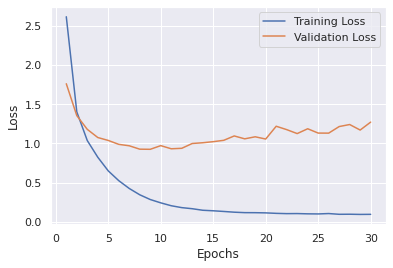

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

train_acc1  = history_model1.history['accuracy']
train_loss1 = history_model1.history['loss']
val_acc1  = history_model1.history['val_accuracy']
val_loss1 = history_model1.history['val_loss']

epochs = range(1, len(train_acc1) + 1)

plt.plot(epochs, train_loss1, label = 'Training Loss')
plt.plot(epochs, val_loss1, label = 'Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

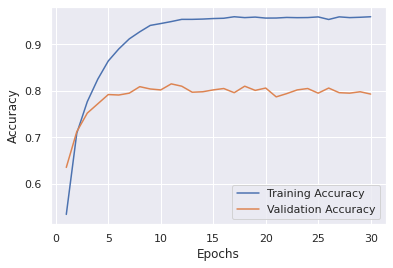

In [ ]:
plt.plot(epochs, train_acc1, label = 'Training Accuracy')
plt.plot(epochs, val_acc1, label = 'Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

The network begins to overfit after 9 epochs because the validation loss starts to increase after epoch 9 (in my case).

**11. Try to improve the performance of your model using regularization methods. Specifically, try the following methods:**

*   **L2 weight regularization with alpha=0.001 applied to both hidden layers (call it `model2`)**
*   **dropout with p=0.1 applied to both hidden layers (call it `model3`)**

**Keep all other parameters the same as your first model. Make sure to monitor perofrmance on the validation set to use in the next question. (20 pts)**

Below, I develop and train model2, in which L2 weight regularization with alpha=0.001 is applied to both hidden layers.

In [ ]:
from tensorflow.keras import regularizers

model2 = models.Sequential()
model2.add(layers.Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.001), input_shape=(10000,)))
model2.add(layers.Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.001)))
model2.add(layers.Dense(46, activation='softmax'))

model2.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

history_model2 = model2.fit(partial_x_train,
                            partial_y_train,
                            epochs=30,
                            batch_size=512,
                            validation_data=(x_val, y_val))

Epoch 1/30
16/16 [==============================] - 2s 65ms/step - loss: 2.6905 - accuracy: 0.5233 - val_loss: 1.8768 - val_accuracy: 0.6410
Epoch 2/30
16/16 [==============================] - 1s 52ms/step - loss: 1.5585 - accuracy: 0.6977 - val_loss: 1.5071 - val_accuracy: 0.7040
Epoch 3/30
16/16 [==============================] - 1s 53ms/step - loss: 1.2494 - accuracy: 0.7548 - val_loss: 1.3554 - val_accuracy: 0.7340
Epoch 4/30
16/16 [==============================] - 1s 51ms/step - loss: 1.0650 - accuracy: 0.7990 - val_loss: 1.2705 - val_accuracy: 0.7580
Epoch 5/30
16/16 [==============================] - 1s 53ms/step - loss: 0.9313 - accuracy: 0.8330 - val_loss: 1.1873 - val_accuracy: 0.7840
Epoch 6/30
16/16 [==============================] - 1s 54ms/step - loss: 0.8295 - accuracy: 0.8611 - val_loss: 1.1402 - val_accuracy: 0.7930
Epoch 7/30
16/16 [==============================] - 1s 53ms/step - loss: 0.7507 - accuracy: 0.8839 - val_loss: 1.1276 - val_accuracy: 0.7980
Epoch 8/30
16

Now, let's develop and train model3, in which dropout with p=0.1 is applied to both hidden layers.

In [ ]:
model3 = models.Sequential()
model3.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model3.add(layers.Dropout(0.1))
model3.add(layers.Dense(64, activation='relu'))
model3.add(layers.Dropout(0.1))
model3.add(layers.Dense(46, activation='softmax'))

model3.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

history_model3 = model3.fit(partial_x_train,
                            partial_y_train,
                            epochs=30,
                            batch_size=512,
                            validation_data=(x_val, y_val))

Epoch 1/30
16/16 [==============================] - 2s 95ms/step - loss: 2.6891 - accuracy: 0.4999 - val_loss: 1.7960 - val_accuracy: 0.6300
Epoch 2/30
16/16 [==============================] - 1s 51ms/step - loss: 1.5052 - accuracy: 0.6863 - val_loss: 1.3831 - val_accuracy: 0.7100
Epoch 3/30
16/16 [==============================] - 1s 51ms/step - loss: 1.1620 - accuracy: 0.7429 - val_loss: 1.2023 - val_accuracy: 0.7440
Epoch 4/30
16/16 [==============================] - 1s 52ms/step - loss: 0.9420 - accuracy: 0.7937 - val_loss: 1.0802 - val_accuracy: 0.7780
Epoch 5/30
16/16 [==============================] - 1s 81ms/step - loss: 0.7820 - accuracy: 0.8332 - val_loss: 1.0079 - val_accuracy: 0.7900
Epoch 6/30
16/16 [==============================] - 1s 87ms/step - loss: 0.6528 - accuracy: 0.8577 - val_loss: 0.9491 - val_accuracy: 0.8080
Epoch 7/30
16/16 [==============================] - 1s 59ms/step - loss: 0.5425 - accuracy: 0.8819 - val_loss: 0.9155 - val_accuracy: 0.8100
Epoch 8/30
16

**12. Create a graph and plot the validation loss of all the three models on that graph. Use this graph to decide which model you are going to select and why. (10 pts)**

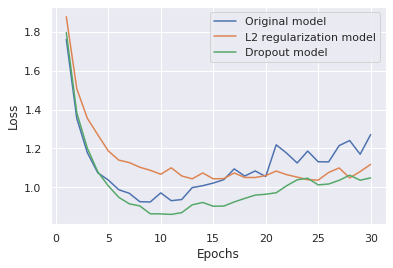

In [ ]:
val_loss2 = history_model2.history['val_loss']
val_loss3 = history_model3.history['val_loss']

epochs = range(1, len(val_loss2) + 1)

plt.plot(epochs, val_loss1, label = 'Original model')
plt.plot(epochs, val_loss2, label = 'L2 regularization model')
plt.plot(epochs, val_loss3, label = 'Dropout model')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

From the above graph, it can be seen that the dropout model achieves the smallest (lowest) validation loss among the 3 models. Hence, we select the dropout model as the best model among the 3 we tried.
It starts overfitting after 11 epochs. So, to build the final model, I will stop the training process after 11 epochs in the next question.

**13. Apply early stopping to your selected model from the previous question to prevent it from overfitting. Call this the `final_model`. Evaluate this `final_model` on the test set and report the test accuracy. How does it compare to the test accuracy you obtained from your first model in Question 8? (10 pts)**

In [ ]:
final_model = models.Sequential()
final_model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
final_model.add(layers.Dropout(0.1))
final_model.add(layers.Dense(64, activation='relu'))
final_model.add(layers.Dropout(0.1))
final_model.add(layers.Dense(46, activation='softmax'))

final_model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

history_final_model = final_model.fit(partial_x_train,
                            partial_y_train,
                            epochs=11,
                            batch_size=512,
                            validation_data=(x_val, y_val))

Epoch 1/11
16/16 [==============================] - 2s 61ms/step - loss: 2.6721 - accuracy: 0.5321 - val_loss: 1.7565 - val_accuracy: 0.6570
Epoch 2/11
16/16 [==============================] - 1s 60ms/step - loss: 1.4699 - accuracy: 0.6943 - val_loss: 1.3462 - val_accuracy: 0.7090
Epoch 3/11
16/16 [==============================] - 1s 86ms/step - loss: 1.1348 - accuracy: 0.7468 - val_loss: 1.1733 - val_accuracy: 0.7390
Epoch 4/11
16/16 [==============================] - 1s 81ms/step - loss: 0.9315 - accuracy: 0.7889 - val_loss: 1.0693 - val_accuracy: 0.7740
Epoch 5/11
16/16 [==============================] - 1s 51ms/step - loss: 0.7817 - accuracy: 0.8244 - val_loss: 1.0028 - val_accuracy: 0.7900
Epoch 6/11
16/16 [==============================] - 1s 50ms/step - loss: 0.6555 - accuracy: 0.8478 - val_loss: 0.9725 - val_accuracy: 0.7850
Epoch 7/11
16/16 [==============================] - 1s 52ms/step - loss: 0.5527 - accuracy: 0.8740 - val_loss: 0.9627 - val_accuracy: 0.7880
Epoch 8/11
16

In [ ]:
final_results = final_model.evaluate(x_test, one_hot_test_labels)

71/71 [==============================] - 0s 3ms/step - loss: 0.9678 - accuracy: 0.7930


We achieved a test accuracy of 79.3%, which is higher than our first model, which had a test accuracy of about 77.0%. Thanks to dropout and early stopping, we were able to reduce overfitting and slightly improve the performance of our neural network on new (unseen) data.